<a href="https://colab.research.google.com/github/Oebele/Deep-lerning-for-beginners/blob/master/Recurrent_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recurrent Neural Networks

In [ ]:
tensorflow_version 2.x


## Simple RNNs
## Word Embedding + RNN on IMDB



In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence

inpt_dim =  128
index_from = 3

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000,
                                                      start_char=1,
                                                      oov_char=2,
                                                      index_from=index_from,
                                                      skip_top=20)
x_train = sequence.pad_sequences(x_train, maxlen=inpt_dim)
x_test = sequence.pad_sequences(x_test, maxlen=inpt_dim)

x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print(' '.join(str(int(id)) for id in x_train[7]))

word_to_id = imdb.get_word_index()
word_to_id = {k:(v+index_from) for k,v in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2
word_to_id["<UNUSED>"] = 3

id_to_word = {value:key for key,value in word_to_id.items()}
print(' '.join(id_to_word[id] for id in x_train[7]))


17465344/17464789 [==============================] - 0s 0us/step
x_train shape: (25000, 128)
x_test shape: (25000, 128)
55 655 707 6371 956 225 1456 841 42 1310 225 2 2493 1467 7722 2828 21 2 2 2 364 23 2 2228 2407 225 24 76 133 2 2 189 2293 2 2 814 2 2 2 2642 2 47 2 682 364 352 168 44 2 45 24 913 93 21 247 2441 2 116 34 35 1859 2 72 177 2 164 2 901 344 44 2 191 135 2 126 421 233 2 259 2 2 2 2 6847 2 2 3074 2 112 199 753 357 39 63 2 115 2 763 2 2 35 3282 1523 65 57 599 2 1916 277 1730 37 25 92 202 2 8848 44 25 28 2 22 2 122 24 4171 72 33 32
1646592/1641221 [==============================] - 0s 0us/step
very middle class suburban setting there's zero atmosphere or mood there's <UNK> lesbian suggest incestuous kiss but <UNK> <UNK> <UNK> low on <UNK> exploitation scale there's not much here <UNK> <UNK> horror crowd <UNK> <UNK> filmed <UNK> <UNK> <UNK> california <UNK> has <UNK> modern low budget look about <UNK> it's not badly made but rather forgettable <UNK> acting by an unknown <UNK> m

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import SimpleRNN, Embedding, BatchNormalization
from tensorflow.keras.layers import Dense, Activation, Input, Dropout
from keras.datasets import imdb
from keras.preprocessing import sequence
import numpy as np

seqnc_lngth =  128
embddng_dim = 64
vocab_size = 10000

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size, skip_top=20)
x_train = sequence.pad_sequences(x_train, maxlen=seqnc_lngth)
x_test = sequence.pad_sequences(x_test, maxlen=seqnc_lngth)

x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# now with batch norm
inpt_vec = Input(shape=(seqnc_lngth,))
l1 = Embedding(vocab_size, embddng_dim, input_length=seqnc_lngth)(inpt_vec)
l2 = Dropout(0.3)(l1)
l3 = SimpleRNN(32)(l2)
l4 = BatchNormalization()(l3)
l5 = Dropout(0.2)(l4)
output = Dense(1, activation='sigmoid')(l5)

# model that takes input and encodes it into the latent space
rnn = Model(inpt_vec, output)

rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
rnn.summary()


x_train shape: (25000, 128)
x_test shape: (25000, 128)
25000 train samples
25000 test samples
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 128, 64)           640000    
_________________________________________________________________
dropout (Dropout)            (None, 128, 64)           0         
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                3104      
_________________________________________________________________
batch_normalization (BatchNo (None, 32)                128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
__________________________

Epoch 1/1000
250/250 [==============================] - 14s 57ms/step - loss: 0.5917 - accuracy: 0.6749 - val_loss: 1.2764 - val_accuracy: 0.5008
Epoch 2/1000
250/250 [==============================] - 14s 55ms/step - loss: 0.3508 - accuracy: 0.8439 - val_loss: 0.7823 - val_accuracy: 0.6118
Epoch 3/1000
250/250 [==============================] - 14s 56ms/step - loss: 0.2532 - accuracy: 0.8974 - val_loss: 1.4494 - val_accuracy: 0.5842
Epoch 4/1000
250/250 [==============================] - 14s 56ms/step - loss: 0.2209 - accuracy: 0.9103 - val_loss: 1.1953 - val_accuracy: 0.6531
Epoch 5/1000
250/250 [==============================] - 14s 55ms/step - loss: 0.1677 - accuracy: 0.9368 - val_loss: 0.5372 - val_accuracy: 0.8117
Epoch 6/1000
250/250 [==============================] - 14s 56ms/step - loss: 0.0998 - accuracy: 0.9639 - val_loss: 0.6341 - val_accuracy: 0.8325
Epoch 7/1000
250/250 [==============================] - 14s 55ms/step - loss: 0.0606 - accuracy: 0.9780 - val_loss: 0.7278 -

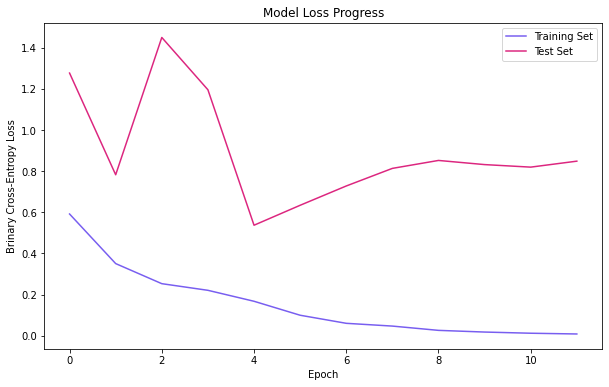

In [ ]:
# Fitting the RNN to the data

from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3,  
                              min_delta=1e-4, mode='min', verbose=1)

stop_alg = EarlyStopping(monitor='val_loss', patience=7, 
                         restore_best_weights=True, verbose=1)

hist = rnn.fit(x_train, y_train, batch_size=100, epochs=1000, 
                   callbacks=[stop_alg, reduce_lr], shuffle=True, 
                   validation_data=(x_test, y_test))

rnn.save_weights("rnn.hdf5")

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], color='#785ef0')
plt.plot(hist.history['val_loss'], color='#dc267f')
plt.title('Model Loss Progress')
plt.ylabel('Brinary Cross-Entropy Loss')
plt.xlabel('Epoch')
plt.legend(['Training Set', 'Test Set'], loc='upper right')
# plt.savefig('ch.13.rnn.imdb.loss.png', dpi=350, bbox_inches='tight')
plt.show()


In [ ]:
# Generate predictions
predictions = rnn.predict(x_train[0:8])
print(predictions)

for i in range(2):
  INDEX_FROM=3   # word index offset
  word_to_id = imdb.get_word_index()
  word_to_id = {k:(v+INDEX_FROM) for k,v in word_to_id.items()}
  word_to_id["<PAD>"] = 0
  word_to_id["<START>"] = 1
  word_to_id["<UNK>"] = 2
  word_to_id["<UNUSED>"] = 3

  id_to_word = {value:key for key,value in word_to_id.items()}
  print('=================================================')
  print(f'Sample = {i} | Length = {len(x_test[i])}')
  print('=================================================')
  print(' '.join(id_to_word[id] for id in x_test[i] ))


[[9.9588227e-01]
 [1.2411210e-01]
 [5.8138072e-03]
 [9.9836600e-01]
 [2.3013234e-02]
 [2.6406199e-02]
 [9.9583995e-01]
 [1.9255280e-04]]
Sample = 0 | Length = 128
<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <UNK> please give <UNK> one <UNK> miss <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> rest <UNK> <UNK> cast rendered terrible performances <UNK> show <UNK> flat flat flat <UNK> <UNK> <UNK> don't know how michael madison could have allowed <UNK> one on his plate he almost seemed <UNK> know <UNK> wasn't going <UNK> work out <UNK> his performance <UNK> quite <UNK> so all you madison fans give <UNK> <UNK> miss
Sample = 1 | Length = 128
young man regular altman player michael murphy has <

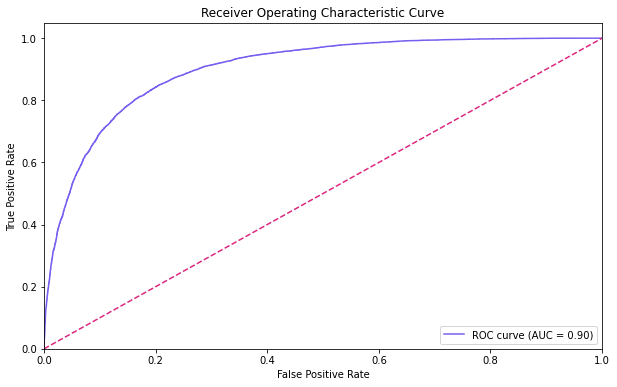

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

y_hat = rnn.predict(x_test)

# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds = roc_curve(y_test, y_hat)
roc_auc = auc(fpr, tpr)

fig = plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='#785ef0', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='#dc267f', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
# plt.savefig('ch.13.rnn.imdb.roc.png', dpi=350, bbox_inches='tight')
plt.show()
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
y_pred = np.where(y_hat>=optimal_threshold, 1, 0)
print(balanced_accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

## Long Short-Term Memory Models

In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Embedding, BatchNormalization
from tensorflow.keras.layers import Dense, Activation, Input, Dropout
from keras.datasets import imdb
from keras.preprocessing import sequence
import numpy as np

seqnc_lngth =  128
embddng_dim = 64
vocab_size = 10000

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size, skip_top=20)
x_train = sequence.pad_sequences(x_train, maxlen=seqnc_lngth)
x_test = sequence.pad_sequences(x_test, maxlen=seqnc_lngth)

x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# now with batch norm
inpt_vec = Input(shape=(seqnc_lngth,))
l1 = Embedding(vocab_size, embddng_dim, input_length=seqnc_lngth)(inpt_vec)
l2 = Dropout(0.3)(l1)
l3 = LSTM(32)(l2)
l4 = BatchNormalization()(l3)
l5 = Dropout(0.2)(l4)
output = Dense(1, activation='sigmoid')(l5)

# model that takes input and encodes it into the latent space
lstm = Model(inpt_vec, output)

lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm.summary()


17465344/17464789 [==============================] - 0s 0us/step
x_train shape: (25000, 128)
x_test shape: (25000, 128)
25000 train samples
25000 test samples
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 128, 64)           640000    
_________________________________________________________________
dropout (Dropout)            (None, 128, 64)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 32)                12416     
_________________________________________________________________
batch_normalization (BatchNo (None, 32)                128       
_________________________________________________________________
dropout_1 (Dropout)        

Epoch 1/1000
250/250 [==============================] - 26s 103ms/step - loss: 0.4193 - accuracy: 0.7978 - val_loss: 0.4689 - val_accuracy: 0.8370
Epoch 2/1000
250/250 [==============================] - 26s 104ms/step - loss: 0.2446 - accuracy: 0.9014 - val_loss: 0.3534 - val_accuracy: 0.8420
Epoch 3/1000
250/250 [==============================] - 26s 103ms/step - loss: 0.1840 - accuracy: 0.9274 - val_loss: 0.4049 - val_accuracy: 0.8369
Epoch 4/1000
250/250 [==============================] - 26s 103ms/step - loss: 0.1415 - accuracy: 0.9460 - val_loss: 0.5803 - val_accuracy: 0.8215
Epoch 5/1000
250/250 [==============================] - ETA: 0s - loss: 0.1153 - accuracy: 0.9546
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
250/250 [==============================] - 26s 104ms/step - loss: 0.1153 - accuracy: 0.9546 - val_loss: 0.5515 - val_accuracy: 0.8215
Epoch 6/1000
250/250 [==============================] - 26s 104ms/step - loss: 0.0623 - accuracy: 0.

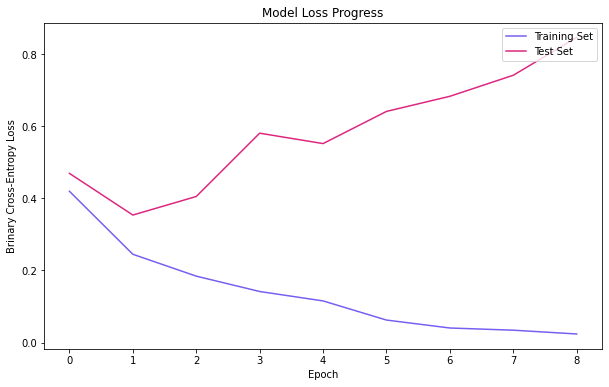

In [2]:
# Fitting the LSTM to the data

from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3,  
                              min_delta=1e-4, mode='min', verbose=1)

stop_alg = EarlyStopping(monitor='val_loss', patience=7, 
                         restore_best_weights=True, verbose=1)

hist = lstm.fit(x_train, y_train, batch_size=100, epochs=1000, 
                   callbacks=[stop_alg, reduce_lr], shuffle=True, 
                   validation_data=(x_test, y_test))

lstm.save_weights("lstm.hdf5")

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], color='#785ef0')
plt.plot(hist.history['val_loss'], color='#dc267f')
plt.title('Model Loss Progress')
plt.ylabel('Brinary Cross-Entropy Loss')
plt.xlabel('Epoch')
plt.legend(['Training Set', 'Test Set'], loc='upper right')
plt.savefig('ch.13.lstm.imdb.loss.png', dpi=350, bbox_inches='tight')
plt.show()


In [3]:
# Generate predictions
predictions = lstm.predict(x_train[0:8])
print(predictions)

for i in range(2):
  INDEX_FROM=3   # word index offset
  word_to_id = imdb.get_word_index()
  word_to_id = {k:(v+INDEX_FROM) for k,v in word_to_id.items()}
  word_to_id["<PAD>"] = 0
  word_to_id["<START>"] = 1
  word_to_id["<UNK>"] = 2
  word_to_id["<UNUSED>"] = 3

  id_to_word = {value:key for key,value in word_to_id.items()}
  print('=================================================')
  print(f'Sample = {i} | Length = {len(x_test[i])}')
  print('=================================================')
  print(' '.join(id_to_word[id] for id in x_test[i] ))


[[0.95594543]
 [0.18238851]
 [0.04419965]
 [0.85191107]
 [0.03235239]
 [0.47633824]
 [0.9237132 ]
 [0.01813704]]
1646592/1641221 [==============================] - 0s 0us/step
Sample = 0 | Length = 128
<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <UNK> please give <UNK> one <UNK> miss <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> rest <UNK> <UNK> cast rendered terrible performances <UNK> show <UNK> flat flat flat <UNK> <UNK> <UNK> don't know how michael madison could have allowed <UNK> one on his plate he almost seemed <UNK> know <UNK> wasn't going <UNK> work out <UNK> his performance <UNK> quite <UNK> so all you madison fans give <UNK> <UNK> miss
Sample = 1 | Length = 128
young man reg

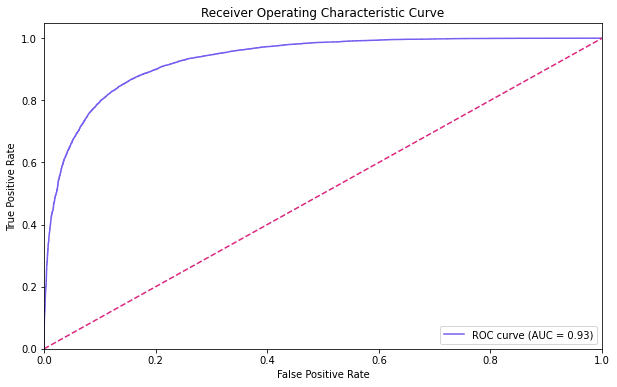

Threshold value is: 0.6396627
0.8558399999999999
[[10568  1932]
 [ 1672 10828]]


In [4]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

y_hat = lstm.predict(x_test)

# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds = roc_curve(y_test, y_hat)
roc_auc = auc(fpr, tpr)

fig = plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='#785ef0', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='#dc267f', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.savefig('ch.13.lstm.imdb.roc.png', dpi=350, bbox_inches='tight')
plt.show()

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
y_pred = np.where(y_hat>=optimal_threshold, 1, 0)
print(balanced_accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


## Sequence to Vector Models
### Unsupervised Model

In [5]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.layers import Embedding, LSTM
from tensorflow.keras.layers import RepeatVector, TimeDistributed
from tensorflow.keras.datasets import mnist
import numpy as np
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

seqnc_lngth =  28
ltnt_dim = 2 

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

inpt_vec = Input(shape=(seqnc_lngth, seqnc_lngth,))
l1 = Dropout(0.1)(inpt_vec)
l2 = LSTM(seqnc_lngth, activation='tanh', 
          recurrent_activation='sigmoid')(l1)
l3 = BatchNormalization()(l2)
l4 = Dropout(0.1)(l3)
l5 = Dense(ltnt_dim, activation='sigmoid')(l4)

# model that takes input and encodes it into the latent space
encoder = Model(inpt_vec, l5)

l6 = RepeatVector(seqnc_lngth)(l5)
l7 = LSTM(seqnc_lngth, activation='tanh', recurrent_activation='sigmoid', 
          return_sequences=True)(l6)
l8 = BatchNormalization()(l7)
l9 = TimeDistributed(Dense(seqnc_lngth, activation='sigmoid'))(l8)

autoencoder = Model(inpt_vec, l9)

autoencoder.compile(loss='binary_crossentropy', optimizer='adam')
autoencoder.summary()

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5,  
                              min_delta=1e-4, mode='min', verbose=1)

stop_alg = EarlyStopping(monitor='val_loss', patience=15, 
                         restore_best_weights=True, verbose=1)

hist = autoencoder.fit(x_train, x_train, batch_size=100, epochs=1000, 
                       callbacks=[stop_alg, reduce_lr], shuffle=True, 
                       validation_data=(x_test, x_test))


11493376/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)
Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 28, 28)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 28)                6384      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28)                112       
_________________________________________________________________
dropout_3 (Dropout)          (None, 28)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 58   

### Results

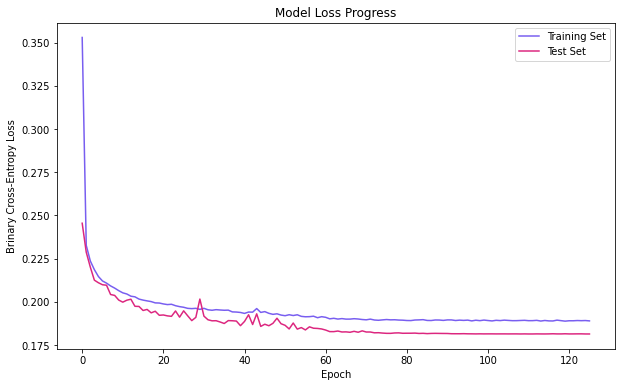

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], color='#785ef0')
plt.plot(hist.history['val_loss'], color='#dc267f')
plt.title('Model Loss Progress')
plt.ylabel('Brinary Cross-Entropy Loss')
plt.xlabel('Epoch')
plt.legend(['Training Set', 'Test Set'], loc='upper right')
# plt.savefig('ch.13.ae.lstm.mnist.loss.png', dpi=350, bbox_inches='tight')
plt.show()


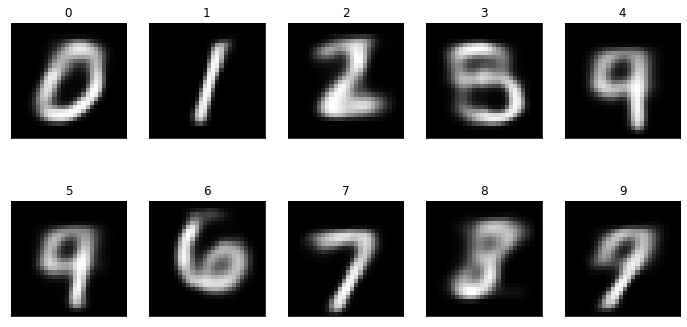

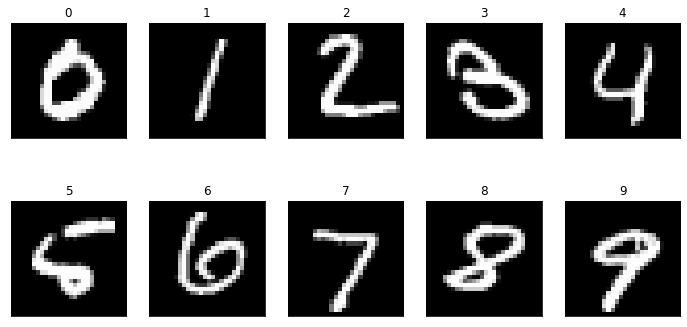

In [7]:
import matplotlib.pyplot as plt
import numpy as np

encdd = encoder.predict(x_test)
x_hat = autoencoder.predict(x_test)

smp_idx = [3,2,1,18,4,8,11,0,61,9]
plt.figure(figsize=(12,6))
for i, (img, y) in enumerate(zip(x_hat[smp_idx].reshape(10, 28, 28), y_test[smp_idx])):
  plt.subplot(2,5,i+1)
  plt.imshow(img, cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.title(y)
plt.savefig('ch.13.ae.lstm.mnist.reconstructed.png', bbox_inches='tight', dpi=350)
plt.show()

plt.figure(figsize=(12,6))
for i, (img, y) in enumerate(zip(x_test[smp_idx].reshape(10, 28, 28), y_test[smp_idx])):
  plt.subplot(2,5,i+1)
  plt.imshow(img, cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.title(y)
# plt.savefig('ch.13.ae.lstm.mnist.original.png', bbox_inches='tight', dpi=350)
plt.show()


(10000, 2)


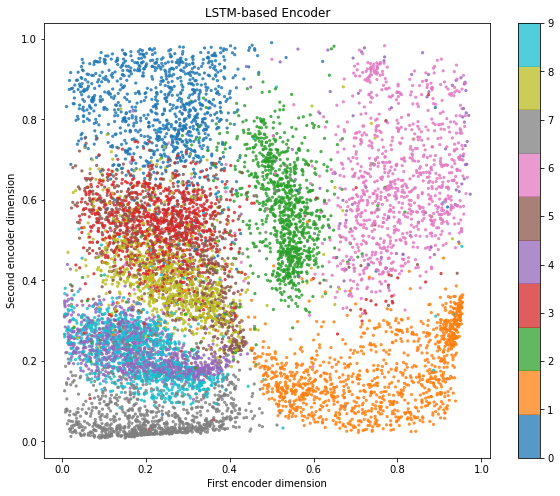

In [8]:
import matplotlib.pyplot as plt

y_ = list(map(int, y_test))
X_ = encdd

print(X_.shape)

plt.figure(figsize=(10,8))
plt.title('LSTM-based Encoder')
plt.scatter(X_[:,0], X_[:,1], s=5.0, c=y_, alpha=0.75, cmap='tab10')
plt.xlabel('First encoder dimension')
plt.ylabel('Second encoder dimension')
plt.colorbar();


## Vector-to-sequence models
### Bidirectional LSTM
#### Implementation and Results

In [9]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.layers import Bidirectional, LSTM
from tensorflow.keras.layers import RepeatVector, TimeDistributed
from tensorflow.keras.datasets import mnist
import numpy as np
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

seqnc_lngth =  28
ltnt_dim = 100 

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

inpt_vec = Input(shape=(seqnc_lngth, seqnc_lngth,))
l1 = Dropout(0.5)(inpt_vec)
l2 = Bidirectional(LSTM(seqnc_lngth, activation='tanh', 
                        recurrent_activation='sigmoid'))(l1)
l3 = BatchNormalization()(l2)
l4 = Dropout(0.5)(l3)
l5 = Dense(ltnt_dim, activation='sigmoid')(l4)

# model that takes input and encodes it into the latent space
encoder = Model(inpt_vec, l5, name='encoder')
encoder.summary()

ltnt_vec = Input(shape=(ltnt_dim,))
l6 = Dropout(0.1)(ltnt_vec)
l7 = RepeatVector(seqnc_lngth)(l6)
l8 = Bidirectional(LSTM(seqnc_lngth, activation='tanh', recurrent_activation='sigmoid', 
          return_sequences=True))(l7)
l9 = BatchNormalization()(l8)
l10 = TimeDistributed(Dense(seqnc_lngth, activation='sigmoid'))(l9)

decoder = Model(ltnt_vec, l10, name='decoder')
decoder.summary()

recon = decoder(encoder(inpt_vec))
autoencoder = Model(inpt_vec, recon, name='ae')

autoencoder.compile(loss='binary_crossentropy', optimizer='adam')
autoencoder.summary()

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5,  
                              min_delta=1e-4, mode='min', verbose=1)

stop_alg = EarlyStopping(monitor='val_loss', patience=15, 
                         restore_best_weights=True, verbose=1)

hist = autoencoder.fit(x_train, x_train, batch_size=100, epochs=1000, 
                       callbacks=[stop_alg, reduce_lr], shuffle=True, 
                       validation_data=(x_test, x_test))


x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)
Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 28, 28)            0         
_________________________________________________________________
bidirectional (Bidirectional (None, 56)                12768     
_________________________________________________________________
batch_normalization_3 (Batch (None, 56)                224       
_________________________________________________________________
dropout_5 (Dropout)          (None, 56)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               5700      
Total params: 18,692
Trainable params: 18,580
Non-trainable para

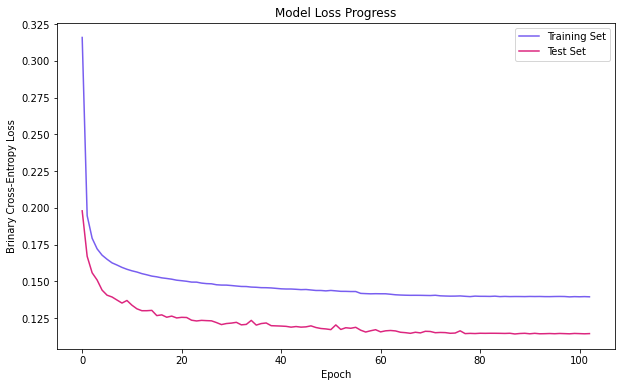

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], color='#785ef0')
plt.plot(hist.history['val_loss'], color='#dc267f')
plt.title('Model Loss Progress')
plt.ylabel('Brinary Cross-Entropy Loss')
plt.xlabel('Epoch')
plt.legend(['Training Set', 'Test Set'], loc='upper right')
# plt.savefig('ch.13.ae.bilstm.mnist.loss.png', dpi=350, bbox_inches='tight')
plt.show()


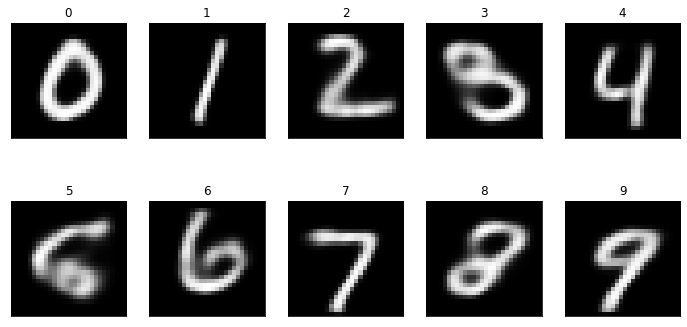

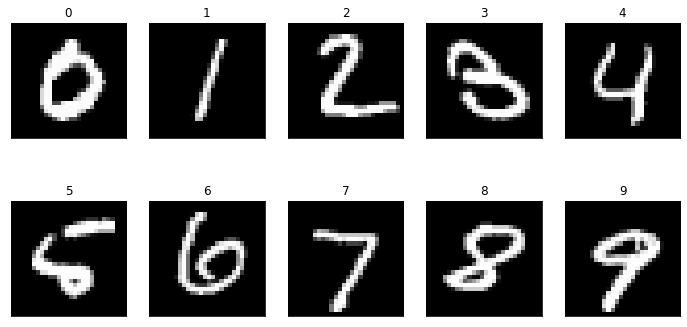

In [11]:
import matplotlib.pyplot as plt
import numpy as np

encdd = encoder.predict(x_test)
x_hat = autoencoder.predict(x_test)

smp_idx = [3,2,1,18,4,8,11,0,61,9]
plt.figure(figsize=(12,6))
for i, (img, y) in enumerate(zip(x_hat[smp_idx].reshape(10, 28, 28), y_test[smp_idx])):
  plt.subplot(2,5,i+1)
  plt.imshow(img, cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.title(y)
# plt.savefig('ch.13.ae.bilstm.mnist.reconstructed.png', bbox_inches='tight', dpi=350)
plt.show()

plt.figure(figsize=(12,6))
for i, (img, y) in enumerate(zip(x_test[smp_idx].reshape(10, 28, 28), y_test[smp_idx])):
  plt.subplot(2,5,i+1)
  plt.imshow(img, cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.title(y)
# plt.savefig('ch.13.ae.bilstm.mnist.original.png', bbox_inches='tight', dpi=350)
plt.show()


(10000, 100)
(10000, 2)


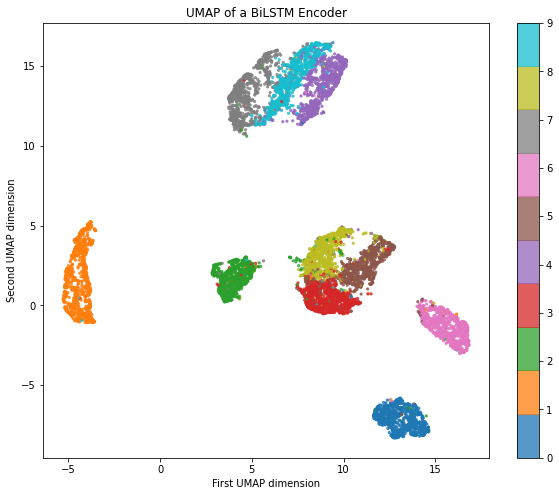

In [12]:
import matplotlib.pyplot as plt
import umap

y_ = list(map(int, y_test))
X_ = encdd

print(X_.shape)

X_ = umap.UMAP().fit_transform(encdd)
print(X_.shape)


plt.figure(figsize=(10,8))
plt.title('UMAP of a BiLSTM Encoder')
plt.scatter(X_[:,0], X_[:,1], s=5.0, c=y_, alpha=0.75, cmap='tab10')
plt.xlabel('First UMAP dimension')
plt.ylabel('Second UMAP dimension')
plt.colorbar();

(1, 28, 28)


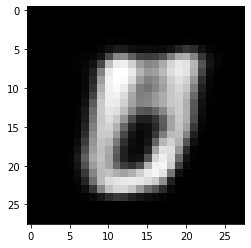

In [13]:
z = np.random.rand(1,100)
x_ = decoder.predict(z)
print(x_.shape)
plt.imshow(x_[0], cmap='gray');

## Sequence to Sequence Models


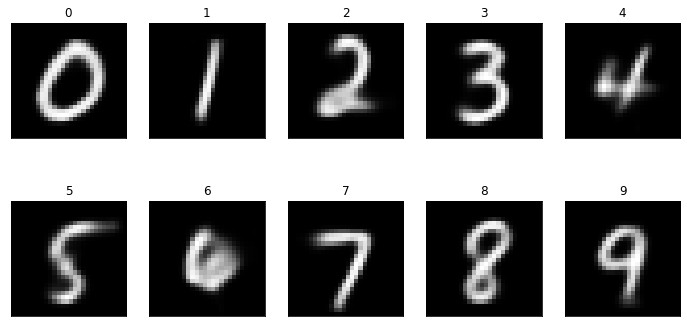

In [14]:
plt.figure(figsize=(12,6))
for i in range(10):
  plt.subplot(2,5,i+1)
  rnd_vec = np.round(np.mean(x_test[y_test==i],axis=0))
  rnd_vec = np.reshape(rnd_vec, (1,28,28))
  z = encoder.predict(rnd_vec)
  decdd = decoder.predict(z)
  plt.imshow(decdd[0], cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.title(i)
# plt.savefig('ch.13.ae.bilstm.mnist.v2s.png', bbox_inches='tight', dpi=350)
plt.show()
